# Environment Sanity Check
Use GPU
Runtime > Change runtime type > GPU

In [1]:
!nvidia-smi

Fri Jan 26 17:50:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Setup


In [2]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 438 (delta 121), reused 57 (delta 54), pack-reused 269
Receiving objects: 100% (438/438), 118.31 KiB | 953.00 KiB/s, done.
Resolving deltas: 100% (223/223), done.
***********************************************************************
We will now install RAPIDS via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 955.2/955.2 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Connect to the drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clustering

In [5]:
import cudf
import cuml
import cugraph
import cuspatial
import cuxfilter

In [6]:
from cuml import PCA

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
A = np.load("/content/drive/MyDrive/EOST/PdR : Self-supervised learning on DRV/Embeddings/LF/embedding_29.npy")

In [9]:
A.shape

(185090, 512)

https://docs.rapids.ai/api/cuml/stable/api/#dimensionality-reduction-and-manifold-learning

https://www.kaggle.com/code/carlmcbrideellis/jane-street-t-sne-using-rapids-cuml

https://distill.pub/2016/misread-tsne/

In [10]:
tsne = cuml.TSNE(n_components=2, perplexity=40, learning_rate=500, n_iter=2000)
tsne_2D = tsne.fit_transform(A)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


[W] [17:56:13.720844] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


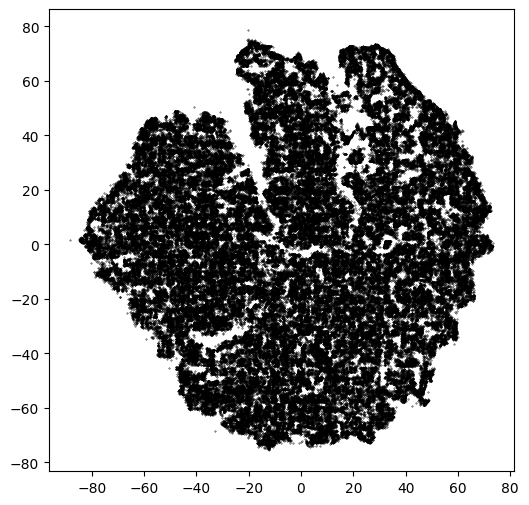

In [11]:
x, y = tsne_2D[:, 0], tsne_2D[:, 1]
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, c='k', s=.1)

In [12]:
tsne_2D.shape

(185090, 2)

In [20]:
data = dict()
for name in ['BP', 'HF', 'MF', 'LF']:
  print(name)
  A = np.load(f"/content/drive/MyDrive/EOST/PdR : Self-supervised learning on DRV/Embeddings/{name}/embedding_29.npy")
  tsne = cuml.TSNE(n_components=2, perplexity=40, learning_rate=400, n_iter=1000, n_neighbors=150)
  tsne_2D = tsne.fit_transform(A)
  data[name] = tsne_2D

BP
[W] [18:19:36.102487] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
HF
[W] [18:20:19.711483] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
MF
[W] [18:21:04.967360] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
LF
[W] [18:21:51.666972] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


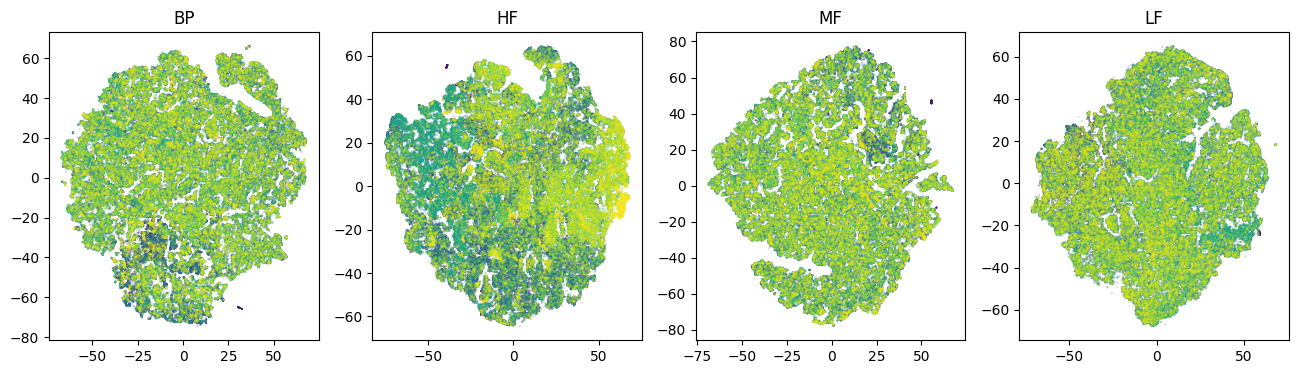

In [21]:
k = 1
plt.figure(figsize=(16, 4))
for name, tsne_2D in data.items():
  plt.subplot(1, 4, k)
  x, y = tsne_2D[:, 0], tsne_2D[:, 1]
  c = np.arange(len(x))
  plt.scatter(x, y, c=c, s=.02)
  plt.title(name)
  k += 1